In [18]:
import numpy as np                                       
import pandas as pd                                      
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from Get_and_Prepare_data import get_prepare
from sklearn.model_selection import train_test_split

In [35]:
df,features,target,x_train, x_test, y_train, y_test = get_prepare(source='Magic_Telescope_data.csv',stand = True,norm =True,test_size = 0.3, random_state = 15,add_ones=False)
x_train,y_train,x_test,y_test=x_train.T,y_train.T,x_test.T,y_test.T
print('\n\nx_train.shape, x_test.shape, y_train.shape, y_test.shape =',x_train.shape, x_test.shape, y_train.shape, y_test.shape)


Features: 
 ['fLen0t1:' 'fWidt1:' 'fSize:' 'fConc:' 'fConc1:' 'fAsym:' 'fM3Lon0:'
 'fM3Trans:' 'fAlp1a:' 'fDist:']

Target: 
 class 




Removing incorrect values from class
done


Removing non float values from features....
done

A total of 77 rows were removed. Their positions are :

 [172, 190, 359, 17889, 17893, 17956, 17990, 18229, 18865, 16364, 11849, 15001, 363, 489, 854, 5654, 2907, 11681, 11688, 621, 631, 707, 1107, 1714, 2080, 2301, 2972, 3169, 4665, 5678, 5689, 6014, 6211, 6659, 6758, 6771, 6922, 6953, 7031, 7342, 7577, 8981, 9168, 9537, 10056, 10673, 10826, 10934, 11139, 11733, 11811, 11865, 12501, 13614, 13989, 14709, 16870, 17124, 17128, 17213, 18013, 18470, 466, 482, 3935, 5251, 8130, 10105, 11680, 11690, 11837, 2917, 11518, 17587, 858, 8215, 8133]


x_train.shape, x_test.shape, y_train.shape, y_test.shape = (13259, 10) (5683, 10) (13259, 1) (5683, 1)


x_train.shape, x_test.shape, y_train.shape, y_test.shape = (10, 13259) (10, 5683) (1, 13259) (1, 5683)


In [20]:
def initialize_parameters(layers_dims, print_shapes = False):
    
    L = len(layers_dims)
    parameters ={}
    
    for i in range(1,L) :
        parameters['W'+ str(i)] = np.random.rand(layers_dims[i],layers_dims[i-1])*0.01
        parameters['b'+ str(i)] = np.zeros((layers_dims[i],1))
        
    if print_shapes :
        initialize_parameters_print_shapes(parameters)
    return parameters        

In [21]:
def initialize_parameters_print_shapes(parameters):
    print('initialised:\n')
    print('W'+ str(i),parameters['W'+ str(i)].shape)
    print('b'+ str(i),parameters['b'+ str(i)].shape)

In [22]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def sigmoid(Z):
        return (1/(1+np.exp(-Z)))


In [23]:
def forward_propogation(X,parameters,layers_dims,print_para = False):
    
    L = len(layers_dims)
    A_prev = X
    
    
    for i in range(1,L-1): # 1st hidden layer to last hidden layer
        parameters ['Z'+ str(i)] = np.array(np.dot(parameters ['W'+ str(i)],A_prev),dtype=np.float64) + parameters ['b'+ str(i)]
        parameters ['A'+ str(i)] = sigmoid(parameters ['Z'+ str(i)])
        A_prev = parameters ['A'+ str(i)]
    
    # for the output layer we will use softmax
    parameters ['Z'+ str(i+1)] = np.dot(parameters ['W'+ str(i+1)],A_prev) + parameters ['b'+ str(i+1)]
    parameters ['AL'] = softmax(parameters ['Z'+ str(i+1)])

    if print_para:
        forward_propogation_print_shapes()
            
    return parameters ['AL'] ,parameters

In [24]:
def forward_propogation_print_shapes():
    print('AL',parameters['AL'])
    for i in range(1,L):
        print('Z'+str(i),parameters['Z'+str(i)])
        print('W'+str(i),parameters['W'+str(i)])

$\large Cost = -\frac{1}{m}\sum_{i=1}^m(y\times log(h(x))+(1-y)\times log(1-h(x)))$

In [25]:
def compute_cost(Y,AL):
    e=1e-5
    m = Y.shape[1]
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(AL+e),np.multiply(1-Y,np.log(1-AL+e))))
    return(cost)

In [26]:
def softmax_backwards(cache):
    return softmax(cache)*(1-softmax(cache))

def sigmoid_backwards(cache):
    return sigmoid(cache)*(1-sigmoid(cache))


$\large\delta A^{[l]} = (\frac{-Y}{AL} - \frac{1-Y}{1-AL})$

$\large\delta Z^{[l]} =  \delta A\times\sigma\prime(Z) $

$\large\delta W^{[l]} =  \frac {1}{m}\delta Z . A^{[l-1]T}$

$\large\delta b^{[l]} = \frac {1}{m}\sum _{i=1}^{m}\delta Z$

$\large\delta A^{[l-1]} = W^{[l]T} . dZ^{[l]}$

In [28]:
def backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False):
    caches = {}
    m = Y.shape[1]
    L = len(layers_dims)
    flag = True
    parameters['A' + str(0)] = X
    for l in reversed(range(1,L)): # last activation to first
        
        if (flag) :   
            caches['dAL'] = np.divide(-Y,AL)-np.divide(1-Y,1-AL)                               
            caches['dZ'+ str(l)] = np.multiply(caches['dAL'],softmax_backwards(parameters['Z'+ str(l)]) )   
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)          
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)     
            caches['dA' + str(l-1)] = np.dot(parameters['W'+ str(l)].T,caches['dZ' + str(l)])
            flag = False
        else:
            caches['dZ'+ str(l)] = np.multiply(caches['dA' + str(l)],sigmoid_backwards(parameters['Z'+ str(l)]))
            caches['dW'+ str(l)] = (1/m)*np.dot(caches['dZ'+ str(l)],parameters['A' + str(l-1)].T)
            caches['db'+ str(l)] = (1/m)*np.sum(caches['dZ'+ str(l)],axis=1,keepdims=True)
            if (l-1 != 0) :
                caches['dA' + str(l-1)] = np.dot(parameters['W' + str(l)].T,caches['dZ' + str(l)]) 
                
    if print_shapes :
        backpropogation_print_shapes(caches)
    
    return caches

In [29]:
def backpropogation_print_shapes(caches):
    print ('dAL',caches['dAL'].shape)
    for l in range(1,L):
        print("dZ"+ str(l),caches['dZ'+ str(l)].shape)
        print("dW"+ str(l),caches['dW'+ str(l)].shape)
        print("db"+ str(l),caches['db'+ str(l)].shape)
        if (l-1 != 0) :
            print('dA' + str(l-1),caches['dA' + str(l-1)].shape)

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}$$

In [30]:
def update_parameters(parameters,caches,alpha,L):
    for l in range(L-1):
        parameters['W'+ str(l+1)] = parameters['W'+ str(l+1)] - alpha * caches['dW'+ str(l+1)]
        parameters['b'+ str(l+1)] = parameters['b'+ str(l+1)] - alpha * caches['db'+ str(l+1)]
    return parameters

In [32]:
def predict(X, Y, parameters,layers_dims):
    m = X.shape[1]
    AL, caches = forward_propogation(X, parameters,layers_dims)
    threshold = np.sum(AL)/len(AL)
    for i in range(AL.shape[1]):
        if (AL[0,i]>threshold):
            AL[0,i]=1
        else:
            AL[0,i]=0
    print("Accuracy: "  + str((np.sum((AL == Y))/m)*100))
    return AL

In [33]:
def nn( X, Y, layers_dims, iterations,alpha, no_of_prints=15):
    
    parameters = initialize_parameters(layers_dims, print_shapes = False)
    costs = []
    
    if(no_of_prints>0):
        flag = True
        val = int(itera/no_of_prints)
    elif (no_of_prints==0):
        flag = False
    else:
        flag = True
        val = 1
    
    for i in range(1,iterations):

        AL ,caches = forward_propogation(X,parameters,layers_dims)
        cost = compute_cost(Y,AL)
        caches = backpropogation(layers_dims,parameters,AL,Y,X,print_shapes = False)
        parameters = update_parameters(parameters,caches,alpha,len(layers_dims))
        costs.append(cost)
        
        if (flag and i % val == 0):
            print('Cost after iteration %i : %f'%(i,cost))
        
    print('\nFinal cost = {}'.format(cost))
    p = predict(X, Y, parameters,layers_dims)
    
    return p,costs,parameters

Cost after iteration 400 : 3.290325
Cost after iteration 800 : 3.290318
Cost after iteration 1200 : 3.290300
Cost after iteration 1600 : 3.290286

Final cost = 3.29027849212042
Accuracy: 64.87668753299646
Accuracy: 64.61376033784973


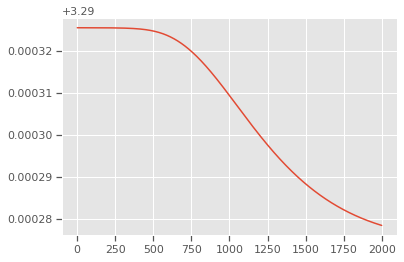

In [34]:
itera,alpha = 2000,0.014
layers_dims = [x_train.shape[0],5,4,2,y_train.shape[0]]
p,costs,parameters = nn( x_train, y_train, layers_dims,itera,alpha, no_of_prints=5)
predict(x_test,y_test,parameters,layers_dims)

import seaborn as sns
sns.lineplot(x=np.arange(1,itera) ,y =costs)